In [2]:
import pandas as pd
import os 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from tensorflow import keras

def npz_to_dataFrame():
    label = 0
    df = pd.DataFrame(columns = ["Name", "Label"])
    for file_name in file:
        label = file_name[7]
        numpy_data = np.array([[file_name,label]])
        df2 = pd.DataFrame(data = numpy_data, columns = ["Name", "Label"])
        df = df.append(df2, ignore_index = True)   
    return(df)
    
    
file = os.listdir("/Users/sanjay/Desktop/Audio-Embedding/npz-values/")    
df = npz_to_dataFrame()
df1 = df.drop([174,861])
df = df1

print(len(df))
train_y = df.Label
train_y = np.array(train_y)
#y = y.reshape(-1, 1)
train_x = df.drop('Label', axis = 1)
'''enc = OneHotEncoder()
y = enc.fit(y).categories
print(y)'''
file = os.listdir("/Users/sanjay/Desktop/Audio-Embedding/test_npz_values/")    
df = npz_to_dataFrame()
'''df1 = df.drop([210,1088])
df = df1'''
print(len(df))
test_y = df.Label
test_y = np.array(test_y)
#y = y.reshape(-1, 1)
test_x = df.drop('Label', axis = 1)

1140
300


In [3]:
print(test_y)

['3' '3' '1' '2' '8' '8' '2' '2' '2' '1' '3' '3' '3' '3' '2' '1' '2' '2'
 '5' '6' '6' '5' '1' '2' '7' '4' '3' '3' '4' '7' '3' '7' '4' '4' '7' '3'
 '5' '6' '8' '2' '1' '2' '8' '6' '5' '5' '8' '6' '6' '8' '5' '7' '4' '4'
 '7' '4' '7' '7' '4' '8' '6' '5' '5' '6' '8' '6' '8' '5' '5' '8' '6' '4'
 '7' '7' '4' '3' '4' '7' '7' '4' '3' '8' '6' '5' '1' '2' '2' '5' '6' '8'
 '6' '8' '5' '5' '8' '6' '4' '7' '7' '4' '7' '4' '4' '7' '5' '6' '8' '8'
 '6' '5' '5' '8' '6' '6' '8' '5' '7' '4' '4' '7' '3' '3' '2' '1' '8' '8'
 '2' '2' '1' '2' '3' '3' '3' '3' '1' '2' '2' '2' '6' '5' '5' '6' '2' '1'
 '4' '7' '3' '3' '7' '4' '7' '4' '4' '7' '5' '6' '8' '8' '6' '5' '5' '8'
 '6' '2' '1' '2' '6' '8' '5' '3' '7' '4' '4' '7' '3' '4' '7' '7' '4' '8'
 '6' '5' '5' '6' '8' '6' '8' '5' '5' '8' '6' '4' '7' '7' '4' '3' '3' '1'
 '2' '2' '2' '8' '8' '2' '1' '3' '3' '7' '4' '3' '3' '4' '7' '2' '1' '5'
 '6' '6' '5' '2' '2' '1' '2' '3' '3' '3' '3' '2' '1' '2' '2' '8' '8' '1'
 '2' '3' '3' '4' '7' '3' '3' '7' '4' '1' '2' '6' '5

In [4]:
def get_train_data(df, max_len):
    numpy_array = []
    numpy_array_2 = []
    zero_array = np.array([0]*512)
    for i in range(len(df)):
        try:
            numpy_array_name = df.iloc[i].Name
            numpy_array = np.load("/Users/sanjay/Desktop/Audio-Embedding/npz-values/" + numpy_array_name, allow_pickle=True)
            numpy_array_1 = numpy_array.f.arr_0
            numpy_array_2.append(numpy_array_1)
            
        except:
            print(i)
    
    numpy_array_3 = [[[]]]
    for i in range(len(numpy_array_2)):
        numpy_array_2[i] = np.transpose(numpy_array_2[i])
        if max_len - len(numpy_array_2[i]) != 0:
            for j in range((max_len - len(numpy_array_2[i]))):
                numpy_array_2[i] = np.append(numpy_array_2[i],[zero_array],axis = 0)
        numpy_array_2[i] = np.transpose(numpy_array_2[i])
    for i in range(len(numpy_array_2)):
        for j in range(len(numpy_array_2[i])):
            k = 0
            l = 0
            while k<=519:
                numpy_array_3.append(sum(numpy_array_2[i][j][k:k+10])/10)
                k += 10    
            numpy_array_3.append(sum(numpy_array_2[i][j][k:k+5])/5)
    return np.array(numpy_array_3)
    

In [5]:
def get_test_data(df, max_len):
    numpy_array = []
    numpy_array_2 = []
    zero_array = np.array([0]*512)
    for i in range(len(df)):
        try:
            numpy_array_name = df.iloc[i].Name
            numpy_array = np.load("/Users/sanjay/Desktop/Audio-Embedding/test_npz_values/" + numpy_array_name, allow_pickle=True)
            numpy_array_1 = numpy_array.f.arr_0
            numpy_array_2.append(numpy_array_1)
            
        except:
            print(i)
    
    numpy_array_3 = [[[]]]
    for i in range(len(numpy_array_2)):
        numpy_array_2[i] = np.transpose(numpy_array_2[i])
        if max_len - len(numpy_array_2[i]) != 0:
            for j in range((max_len - len(numpy_array_2[i]))):
                numpy_array_2[i] = np.append(numpy_array_2[i],[zero_array],axis = 0)
        numpy_array_2[i] = np.transpose(numpy_array_2[i])
    for i in range(len(numpy_array_2)):
        for j in range(len(numpy_array_2[i])):
            k = 0
            l = 0
            while k<=519:
                numpy_array_3.append(sum(numpy_array_2[i][j][k:k+10])/10)
                k += 10    
            numpy_array_3.append(sum(numpy_array_2[i][j][k:k+5])/5)
    return np.array(numpy_array_3)

In [6]:
def get_maxlen(df):
    numpy_array = []
    numpy_array_2 = []
    for i in range(len(df)):
            numpy_array_name = df.iloc[i].Name
            numpy_array = np.load("/Users/sanjay/Desktop/Audio-Embedding/npz-values/" + numpy_array_name, allow_pickle=True)
            numpy_array_1 = numpy_array.f.arr_0
            numpy_array_2.append(numpy_array_1)
    max_len = 0
    for i in range(len(numpy_array_2)):
        for j in range(len(numpy_array_2[i])):
            if len(numpy_array_2[i][j]) > max_len:
                max_len = len(numpy_array_2[i][j])
    return max_len, numpy_array_2

In [7]:
max_len = 525
x_train = get_train_data(train_x, max_len)
x_train = x_train[1:]
x_train = np.array(x_train)
x_train= x_train.reshape((1140, 53, 512))

x_test = get_test_data(test_x, max_len)
x_test = x_test[1:]
x_test = np.array(x_test)
x_test= x_test.reshape((300, 53, 512))

print(x_test.shape, x_train.shape, train_y.shape, test_y.shape)



(300, 53, 512) (1140, 53, 512) (1140,) (300,)


In [8]:
x_train = np.asarray(x_train).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
x_test =  np.asarray(x_test).astype(np.float32)
test_y = np.asarray(test_y).astype(np.float32)

In [9]:
n_dim = x_train.shape[1]  
n_classes = train_y.shape[0] 
print(n_dim)
print(n_classes)
#print(test_x)

53
1140


In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystop = EarlyStopping(monitor='val_loss', mode='min', patience=75, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=True)


In [12]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from tensorflow.keras.layers import LSTM


def create_model():  
    model = Sequential()
    model.add(BatchNormalization(axis=-1, input_shape=(53,512)))
    model.add(LSTM(n_dim, dropout = 0.1, return_sequences=False, recurrent_dropout = 0.2))
    model.add(Dense(9, kernel_initializer='uniform', activation='softmax'))          
    keras.optimizers.Adam(lr=1e-5, decay=1e-6)
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])  
    return model
   
  
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 53, 512)           2048      
_________________________________________________________________
lstm (LSTM)                  (None, 53)                119992    
_________________________________________________________________
dense (Dense)                (None, 9)                 486       
Total params: 122,526
Trainable params: 121,502
Non-trainable params: 1,024
_________________________________________________________________
None


In [13]:
hist = model.fit(x_train, train_y, epochs=100, batch_size=40, 
         validation_data = (x_test[:150], test_y[:150]), callbacks=[earlystop])

Train on 1140 samples, validate on 150 samples
Epoch 1/100
1140/1140 [==============================] - 4s 3ms/sample - loss: 1.9736 - accuracy: 0.2904 - val_loss: 2.0945 - val_accuracy: 0.2067
Epoch 2/100
1140/1140 [==============================] - 2s 2ms/sample - loss: 1.6411 - accuracy: 0.4377 - val_loss: 1.9911 - val_accuracy: 0.2867
Epoch 3/100
1140/1140 [==============================] - 2s 2ms/sample - loss: 1.4351 - accuracy: 0.5412 - val_loss: 1.8635 - val_accuracy: 0.3133
Epoch 4/100
1140/1140 [==============================] - 2s 2ms/sample - loss: 1.2495 - accuracy: 0.6114 - val_loss: 1.6840 - val_accuracy: 0.3667
Epoch 5/100
1140/1140 [==============================] - 2s 2ms/sample - loss: 1.0997 - accuracy: 0.6632 - val_loss: 1.6587 - val_accuracy: 0.3867
Epoch 6/100
1140/1140 [==============================] - 2s 2ms/sample - loss: 0.9700 - accuracy: 0.7035 - val_loss: 1.4871 - val_accuracy: 0.4867
Epoch 7/100
1140/1140 [==============================] - 2s 2ms/sample 

/Users/sanjay/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: 
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


KeyboardInterrupt: 

In [14]:
print(max(hist.history['accuracy']), max(hist.history['val_accuracy']))

NameError: name 'hist' is not defined

In [19]:
evaluate = model.evaluate(x_test[150:], test_y[150:], batch_size=53)
print(evaluate)

150/150 [==============================] - 0s 396us/sample - loss: 1.3329 - accuracy: 0.5133
[1.3328516658147176, 0.5133333]


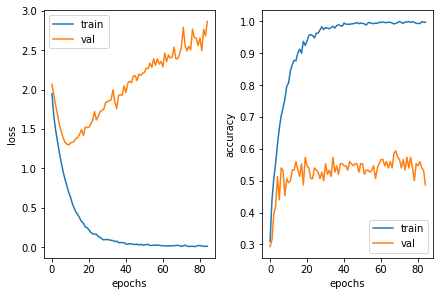

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
ax = axs[0]
ax.plot(hist.history['loss'], label='train')
ax.plot(hist.history['val_loss'], label='val')
ax.legend()
ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax = axs[1] 
ax.plot(hist.history['accuracy'], label='train')
ax.plot(hist.history['val_accuracy'], label='val')
ax.legend()
ax.set_ylabel('accuracy')
ax.set_xlabel('epochs')
plt.show()